In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm.notebook import tqdm
import time
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import kwant
import math
from math import  sqrt
import cmath
from numpy.lib.scimath import sqrt as csqrt
import scipy
from scipy.optimize import fsolve
import copy
from itertools import repeat

import DEDlib

<Figure size 1000x800 with 0 Axes>

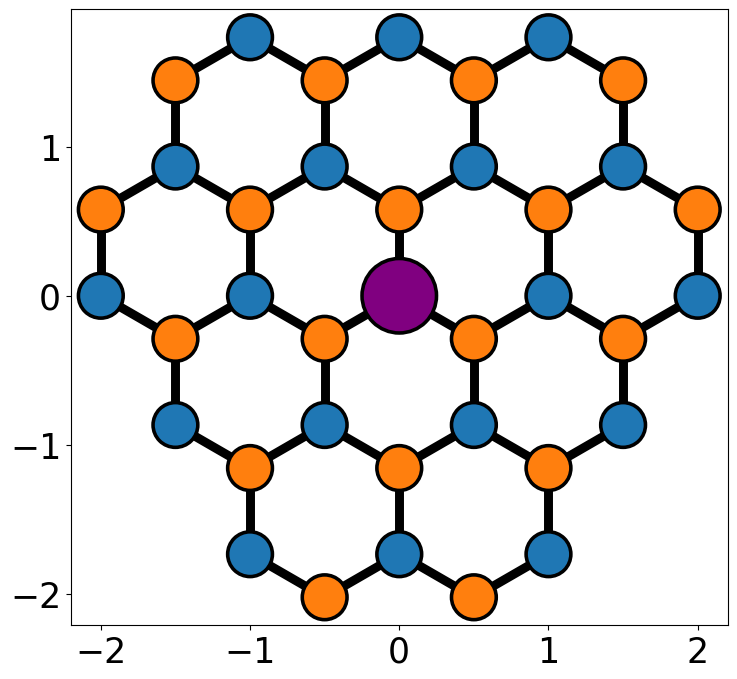

<Figure size 640x480 with 0 Axes>

In [3]:
radius,colorbnd,imp,nd=[1.5,2.3,3.1,4.042,5.1],[7,19,37,61,91],[3,9,18,30,45],np.zeros((5,4),dtype = 'float')
psi2,SPG2,eig,SPrho0=DEDlib.GrapheneAnalyzer(imp[1],DEDlib.Graphenecirclestruct(radius[1],1),colorbnd[1],'GrapheneCirc'+str(radius[1])+'r')

In [39]:
bound=8
etaco=[0.02,1e-24]
SizeO=4001
N=20000
U=6
Sigma=3
poles=4
ctype='n'

omega,eta,AvgSigmadat= np.linspace(-bound,bound,SizeO),etaco[0]*abs(np.linspace(-bound,bound,SizeO))+etaco[1],np.zeros(SizeO,dtype = 'complex_')
c,rhoint=[DEDlib.Jordan_wigner_transform(i, 2*poles) for i in range(2*poles)],-np.imag(SPrho0)/np.pi*((max(omega)-min(omega))/len(SPrho0))/sum(-np.imag(SPrho0)/np.pi*((max(omega)-min(omega))/len(SPrho0)))
selectpT,selectpcT,n,nd=[],np.zeros((N,poles),dtype = 'float'),sum([c[i].dag()*c[i] for i in range(2*poles)]),0

for i in tqdm(range(N)):
    reset=False
    while not reset:
        select=sorted(np.random.choice(np.linspace(-bound,bound,len(rhoint)),poles,p=rhoint,replace=False))
        NewM,nonG=DEDlib.Startrans(poles,select,0,omega,eta)
        """ bathenergy=[]
        impengergy=NewM[0][0]
        for k in range(len(NewM)-1):
            bathenergy.append(NewM[k+1][k+1])
        Vkk=NewM[0,1:] """
        (MBGdat,Ev0),reset=DEDlib.AIMsolver(NewM[0][0], [NewM[k+1][k+1] for k in range(len(NewM)-1)], 
                                   NewM[0,1:], U,Sigma,omega,eta,c, n, ctype)
        #AIMsolver(impengergy, bathenergy, Vkk, Ut[l],Sigma[l],omega,eta,c,reset,n)
        #NewSigmadat=1/nonG-1/MBGdat+3#eig
        if np.isnan(1/nonG-1/MBGdat+Sigma).any() or any(abs(i) >= 1000 for i in np.real(1/nonG-1/MBGdat+Sigma)) or any(float(i) >= 500 for i in np.abs(1/nonG-1/MBGdat+Sigma)): reset=False
    #print(type(AvgSigmadat[0]),type(nonG[0]),type(MBGdat[0]),type(Sigma))
    AvgSigmadat+=(1/nonG-1/MBGdat+Sigma)/N
    print("---%s---" % (AvgSigmadat[2000]*N/(i+1)), end='\r')

  0%|          | 0/20000 [00:00<?, ?it/s]

In [37]:
np.isnan(1/nonG-1/MBGdat+Sigma).any()

False

In [38]:
np.isnan(finalG).any()

False

In [45]:
posimp=9
finalG=1/(1/SPG2-AvgSigmadat+3)#AvgSigmadat[2000] 3
print(AvgSigmadat[2000])
FinSigmadat=-np.imag(finalG)/np.pi
DOS3=-np.imag(SPG2)/np.pi

(3.122667632136302-5.3606893829485316e-05j)


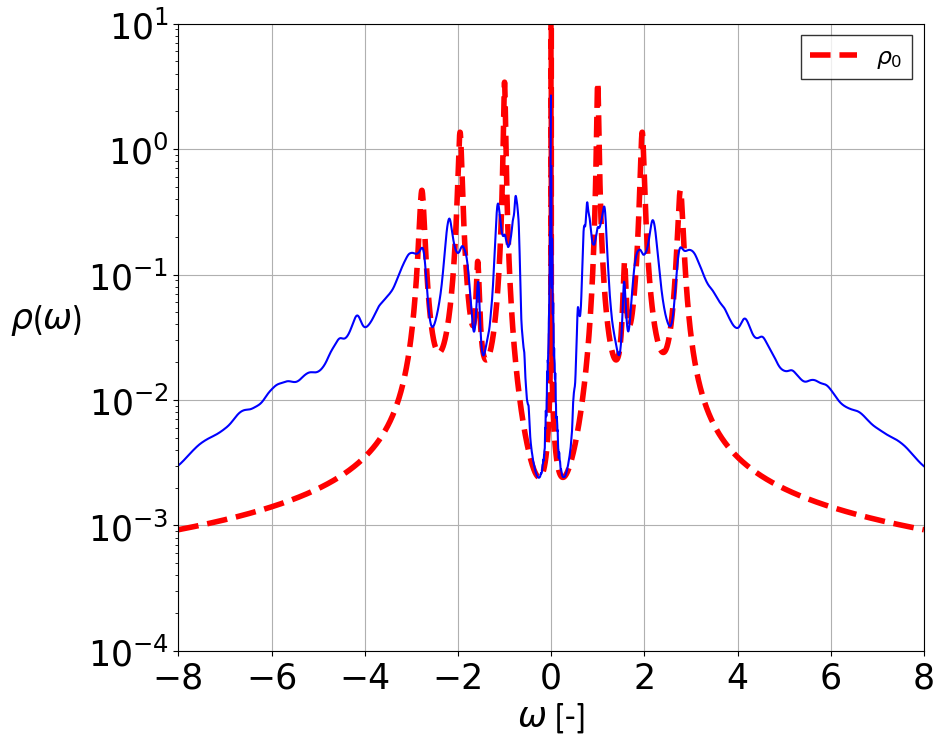

In [44]:
plt.figure(figsize=(10,8))
plt.rc('legend', fontsize=17)
plt.rc('font', size=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=10)
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,DOS3, '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega,fdos,'-b')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid()
plt.tight_layout()

In [31]:
int(np.round(SizeO/2))

2000

In [43]:
fdos=-np.imag(1/(1/SPG2-AvgSigmadat+AvgSigmadat[int(np.round(SizeO/2))]))/np.pi

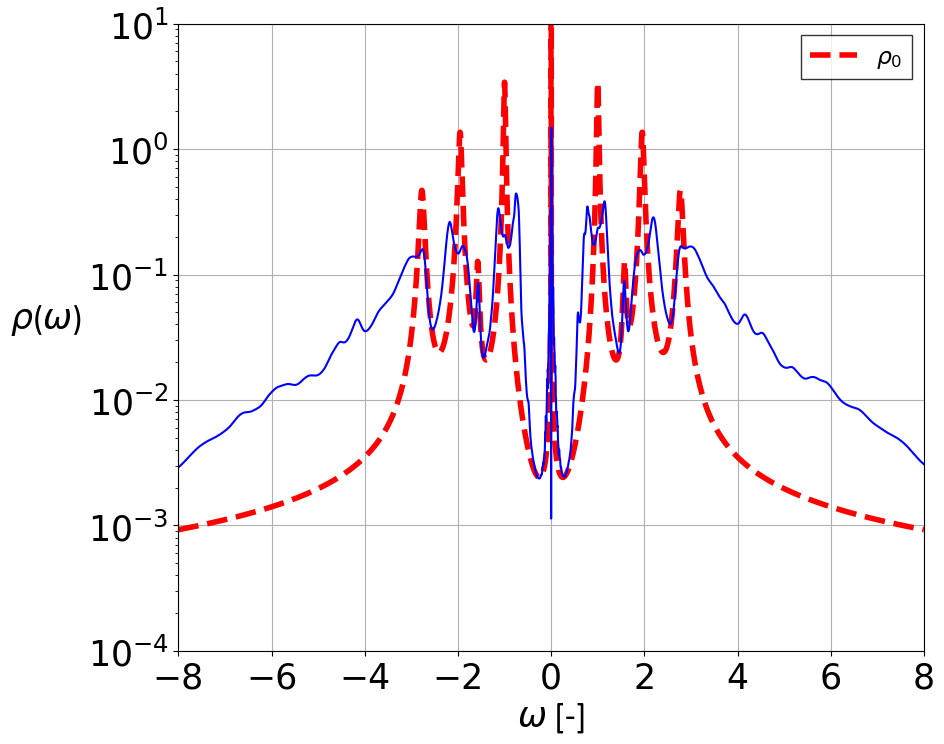

In [46]:
plt.figure(figsize=(10,8))
plt.rc('legend', fontsize=17)
plt.rc('font', size=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=10)
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,DOS3, '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega,FinSigmadat,'-b')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid()
plt.tight_layout()

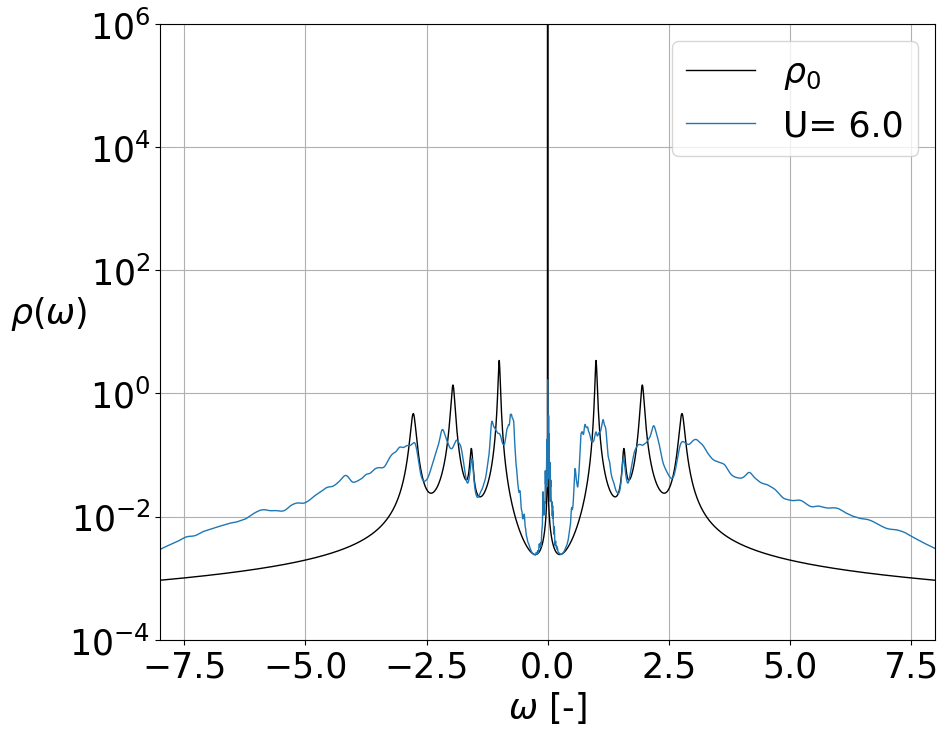

In [ ]:
omega= np.linspace(-8,8,4001)
plt.figure(figsize=(10,8))
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=1000000)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=15)
plt.grid()
plt.xlabel("$\\omega$ [-]")
plt.plot(omega,DOS3,label='$\\rho_0$',linewidth=1,color='black')
for i in range(len(Ut)):
    plt.plot(omega,FinSigmadat,label='U= %.1f'%Ut[i],linewidth=1)
#plt.plot(omega,FinSigmadat[3],label='U= %.1f'%Ut[3],linewidth=1)
plt.legend()

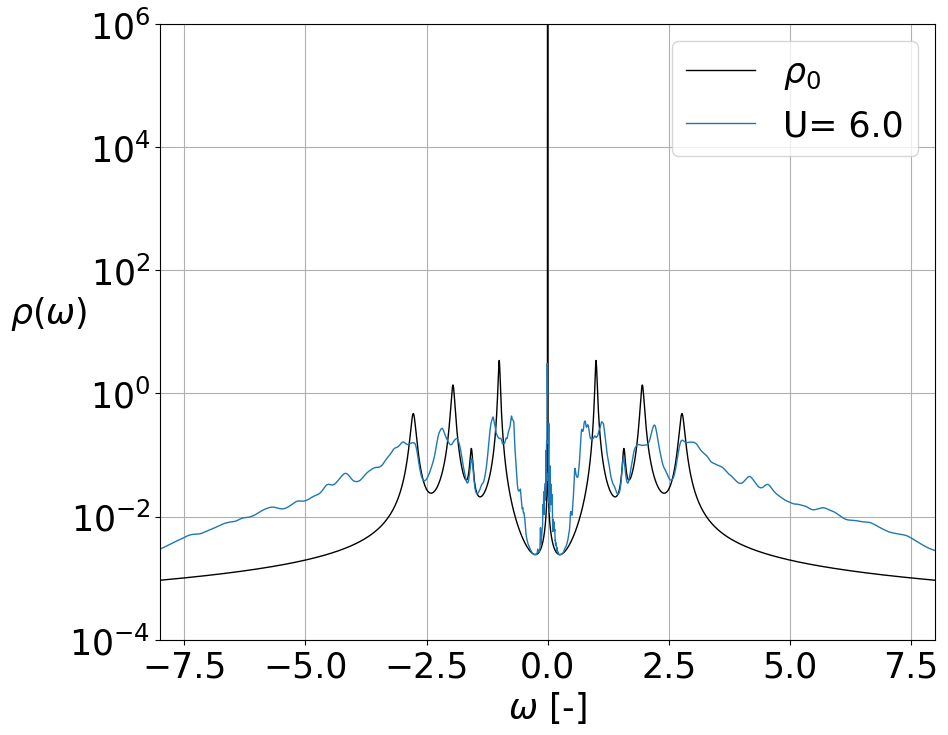

In [6]:
omega= np.linspace(-8,8,4001)
plt.figure(figsize=(10,8))
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=1000000)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=15)
plt.grid()
plt.xlabel("$\\omega$ [-]")
plt.plot(omega,DOS3,label='$\\rho_0$',linewidth=1,color='black')
for i in range(len(Ut)):
    plt.plot(omega,FinSigmadat,label='U= %.1f'%Ut[i],linewidth=1)
#plt.plot(omega,FinSigmadat[3],label='U= %.1f'%Ut[3],linewidth=1)
plt.legend()